<a href="https://colab.research.google.com/github/Zezo-Elkafoury/SMS-Spam-Detection/blob/main/Email_Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed(10)

# Loading Data

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
v1,0
v2,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.rename(columns={'v1':'type','v2':'text'},inplace=True)
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['type']=encoder.fit_transform(df['type'])
df.head(10)

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


# EDA

Distribution of Email types

<Axes: ylabel='count'>

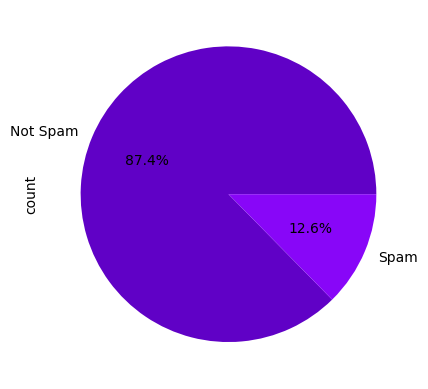

In [ ]:
df['type'].value_counts().plot(kind='pie',labels=['Not Spam','Spam'],autopct='%1.1f%%',colors=sns.color_palette('gnuplot'))

### Counting the number of characters in each message

In [ ]:
df['num_chars']=df['text'].apply(lambda x:len(x))
df.head()

,type,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Counting the number of words in each message

In [ ]:
!pip install nltk==3.8.1

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,type,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


### Counting the number of sentences in each message

In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,type,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


## Text characteristics for non spam messages

In [ ]:
df[df['type']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


## Text characteristics for non spam messages

In [ ]:
df[df['type']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Spam messages seem to be longer

### Visualizing the distribution message lengths

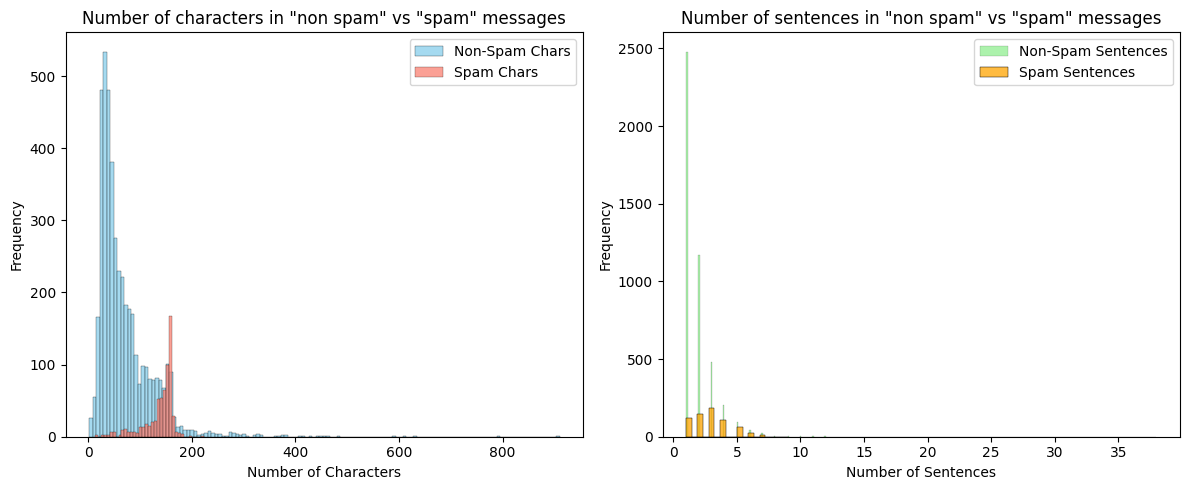

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[df['type']==0]['num_chars'], ax=axes[0], color='skyblue', label='Non-Spam Chars')
sns.histplot(df[df['type']==1]['num_chars'], ax=axes[0], color='salmon', label='Spam Chars')
axes[0].legend()
axes[0].set_title('Number of characters in "non spam" vs "spam" messages')
axes[0].set_xlabel('Number of Characters')
axes[0].set_ylabel('Frequency')

sns.histplot(df[df['type']==0]['num_sentences'], ax=axes[1], color='lightgreen', label='Non-Spam Sentences')
sns.histplot(df[df['type']==1]['num_sentences'], ax=axes[1], color='orange', label='Spam Sentences')
axes[1].legend()
axes[1].set_title('Number of sentences in "non spam" vs "spam" messages')
axes[1].set_xlabel('Number of Sentences')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Correlations

<Axes: >

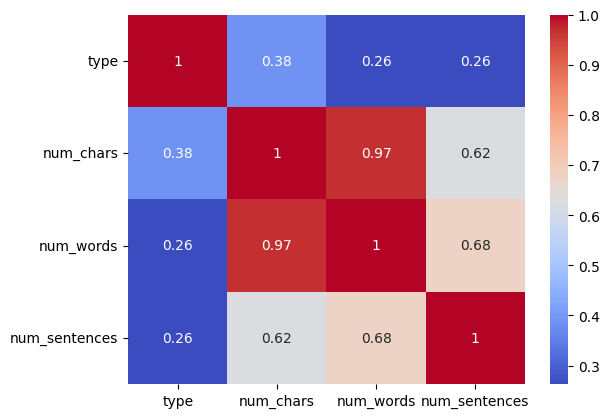

In [ ]:
numeric_columns=['type','num_chars','num_words','num_sentences']
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='coolwarm')

There is a slightly possitive relation between number of characters and message type

# Data Preprocessing for ML

In [ ]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text) # breaking text into tokens
  transformed_text=[]

  for i in text:
    if i.isalnum():
      transformed_text.append(i)
  text=transformed_text[:]
  transformed_text.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation: #removing stopwords and punctuation marks
      transformed_text.append(i)
  text=transformed_text[:]
  transformed_text.clear()
  for i in text:
    transformed_text.append(ps.stem(i)) #stemming
  return " ".join(transformed_text)

In [ ]:
transform_text('This is a spam detector.')

'spam detector'

In [ ]:
df['final_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,type,text,num_chars,num_words,num_sentences,final_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Word Cloud of spam messages

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=700,height=700,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['type']==1]['final_text'].str.cat(sep=' '))

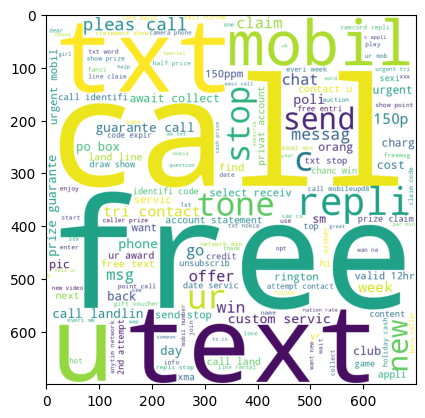

In [ ]:
plt.imshow(spam_wc)

# ML Model building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfidf.fit_transform(df['final_text']).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df['type'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
rf=RandomForestClassifier(
    n_estimators=100,
    random_state=10
)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=10)

Acuuracy on test data using multiple metrics

In [ ]:
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9758220502901354

the data is imbalanced so i will use precision and other metrices rather than acuuracy only

In [ ]:
precision_score(y_test,y_pred)

1.0

Visualizing Predictions vs Actual values

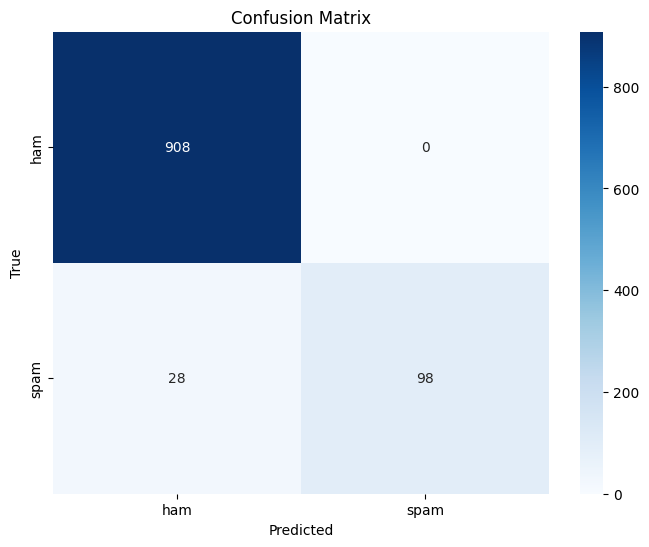

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Cross validation to check for model generalization

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['accuracy', 'precision', 'recall']
cv_results = cross_validate(rf, X, y, cv=5, scoring=scoring)

print("Cross-validation results:")
print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
print(f"Precision: {cv_results['test_precision'].mean()}")
print(f"Recall: {cv_results['test_recall'].mean()}")


Cross-validation results:
Accuracy: 0.9717536011803896
Precision: 0.9881541660953426
Recall: 0.7856371109806225


Saving the model

In [ ]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))